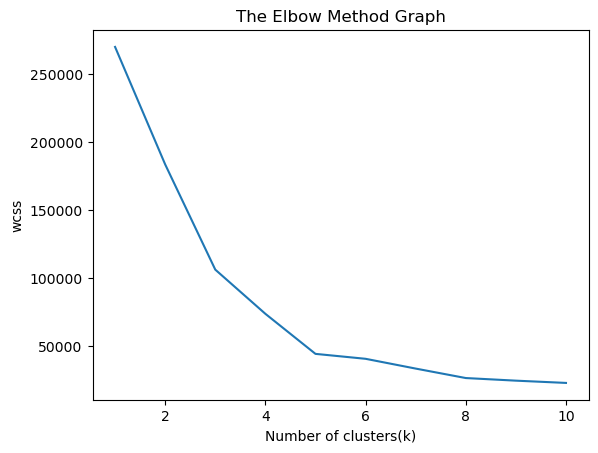

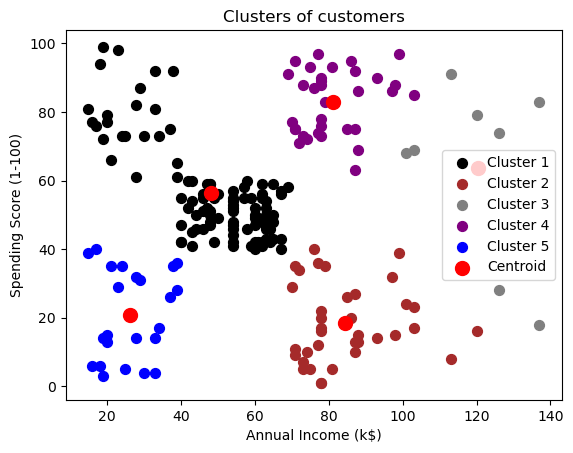

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset= pd.read_csv('Mall_Customers.csv', encoding="ISO-8859-1")
x= dataset.iloc[:, [3,4]].values
from sklearn.cluster import KMeans  
wcss= []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss')  
plt.show()
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 54)  
y_predict= kmeans.fit_predict(x)  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 50, c = 'black', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 50, c = 'brown', label = 'Cluster 2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 50, c = 'grey', label = 'Cluster 3')  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 50, c = 'purple', label = 'Cluster 4')
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroid')
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

In [7]:
import statistics
print(f"\033[1mThe values found from Spending Score : \033[0m")
values = dataset["Spending Score (1-100)"]
mean_val = values.mean()
median_val = values.median()
mode_val = values.mode().tolist()  
variance_val = values.var()       
std_dev_val = values.std()       
Q1 = dataset["Spending Score (1-100)"].quantile(0.25)
Q3 = dataset["Spending Score (1-100)"].quantile(0.75)
IQR = Q3 - Q1
print(f"       Measures of Central Tendency")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"       Measures of Dispersion")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_dev_val}")
print(f"IQR (Interquartile Range): {IQR}")
print()

print(f"\033[1mThe values found from Annual Income are: \033[0m")
Values = dataset["Annual Income (k$)"]
mean_Val = Values.mean()
median_Val = Values.median()
mode_Val = Values.mode().tolist() 
variance_Val = Values.var()       
std_dev_Val = Values.std()       
Q11 = dataset["Annual Income (k$)"].quantile(0.25)
Q33 = dataset["Annual Income (k$)"].quantile(0.75)
IQRS = Q33 - Q11
print(f"       Measures of Central Tendency")
print(f"Mean: {mean_Val}")
print(f"Median: {median_Val}")
print(f"Mode: {mode_Val}")
print(f"       Measures of Dispersion")
print(f"Variance: {variance_Val}")
print(f"Standard Deviation: {std_dev_Val}")
print(f"IQR (Interquartile Range): {IQRS}")

The values found from Spending Score : 
       Measures of Central Tendency
Mean: 50.2
Median: 50.0
Mode: [42]
       Measures of Dispersion
Variance: 666.8542713567839
Standard Deviation: 25.823521668370173
IQR (Interquartile Range): 38.25

The values found from Annual Income are: 
       Measures of Central Tendency
Mean: 60.56
Median: 61.5
Mode: [54, 78]
       Measures of Dispersion
Variance: 689.8355778894472
Standard Deviation: 26.264721165271244
IQR (Interquartile Range): 36.5


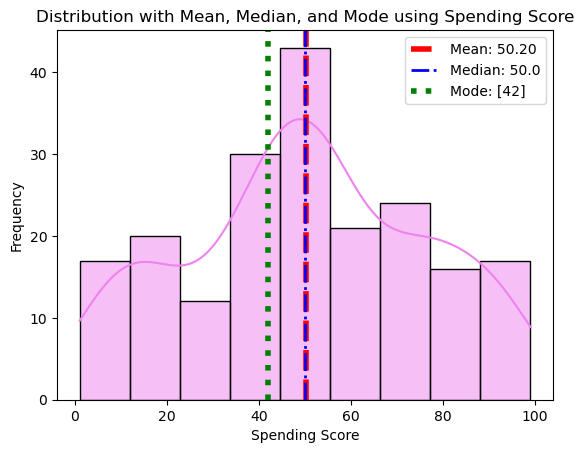

In [8]:
import seaborn as sns
sns.histplot(values, kde=True, color='violet', bins=9)
# Overlay mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_val}')
plt.axvline(mode_val, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_val}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode using Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

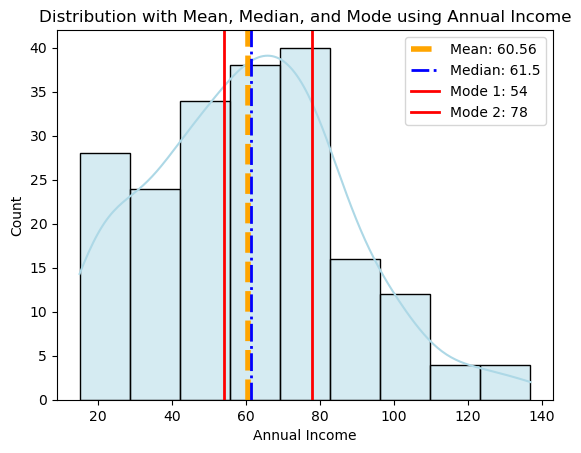

In [9]:
sns.histplot(Values, kde=True, color='lightblue', bins=9)

modes = Values.mode().tolist() 
# Overlay mean, median, and mode
plt.axvline(mean_Val, color='orange', linestyle='--', linewidth=4, label=f'Mean: {mean_Val:.2f}')
plt.axvline(median_Val, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_Val}')
for i, mode_Val in enumerate(modes):
    plt.axvline(mode_Val, color='red', linestyle='-', linewidth=2, label=f'Mode {i+1}: {mode_Val}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode using Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

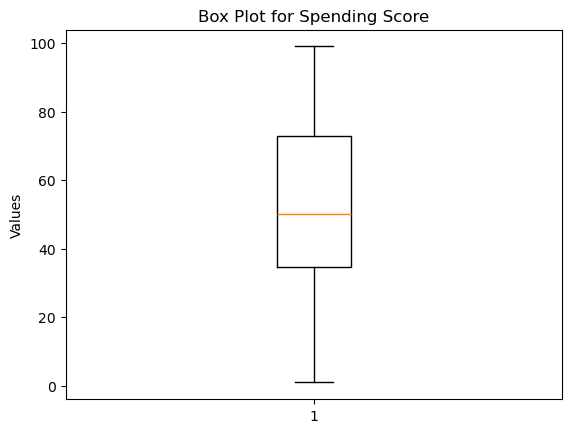

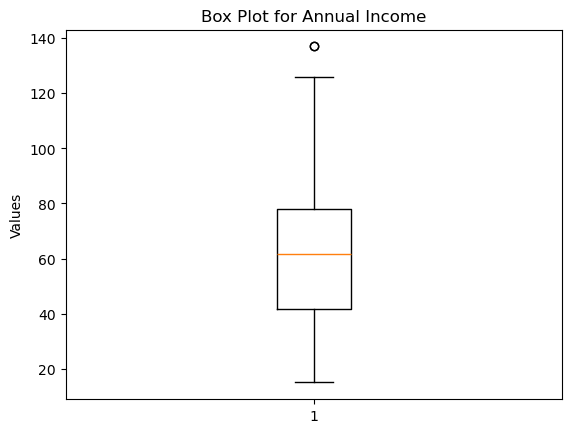

In [11]:
data = dataset["Spending Score (1-100)"]
Data = dataset["Annual Income (k$)"]
plt.boxplot(data)
plt.title("Box Plot for Spending Score")
plt.ylabel("Values")
plt.show()

plt.title("Box Plot for Annual Income")
plt.ylabel("Values")
plt.boxplot(Data)
plt.show()

In [12]:
print(f"\033[1mCovariance and Correlation values using Spending Score and Annual Income : \033[0m")
covariance = dataset['Spending Score (1-100)'].cov(dataset['Annual Income (k$)'])
print("Covariance:", covariance)

# Correlation
correlation = dataset['Spending Score (1-100)'].corr(dataset['Annual Income (k$)'])
print("Correlation:", correlation)

Covariance and Correlation values using Spending Score and Annual Income : 
Covariance: 6.716582914572865
Correlation: 0.009902848094037612


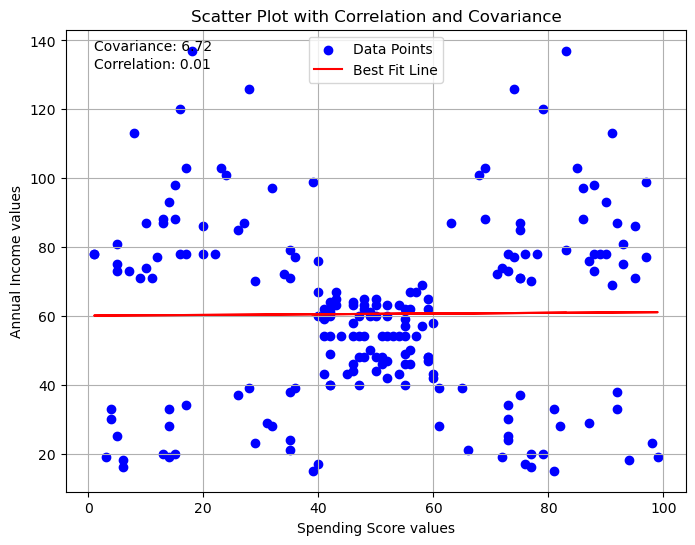


The regression line(red line) being parallel to x-axis shows that there is no relationship between x and y or near 0 corelation and covariance 


In [14]:
cov_matrix = np.cov(dataset['Spending Score (1-100)'], dataset['Annual Income (k$)'])
covariance = cov_matrix[0, 1]

corr_matrix = np.corrcoef(dataset['Spending Score (1-100)'], dataset['Annual Income (k$)'])
correlation = corr_matrix[0, 1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Spending Score (1-100)'], dataset['Annual Income (k$)'], color='blue', label='Data Points')
plt.title('Scatter Plot with Correlation and Covariance')
plt.xlabel('Spending Score values')
plt.ylabel('Annual Income values')

# Add a best-fit line
m, b = np.polyfit(dataset['Spending Score (1-100)'], dataset['Annual Income (k$)'], 1)
plt.plot(dataset['Spending Score (1-100)'], np.polyval([m, b], dataset['Spending Score (1-100)']), color='red', label='Best Fit Line')

# Add text annotations
plt.text(min(dataset['Spending Score (1-100)']), max(dataset['Annual Income (k$)']), f'Covariance: {covariance:.2f}', fontsize=10)
plt.text(min(dataset['Spending Score (1-100)']), max(dataset['Annual Income (k$)'])-5, f'Correlation: {correlation:.2f}', fontsize=10)

plt.legend()
plt.grid(True)
plt.show()
print()
print(f"\033[1mThe regression line(red line) being parallel to x-axis shows that there is no relationship between x and y or near 0 corelation and covariance \033[0m")

Number of female customers: 112
Number with spending score > 70: 32
Probability (p): 0.29


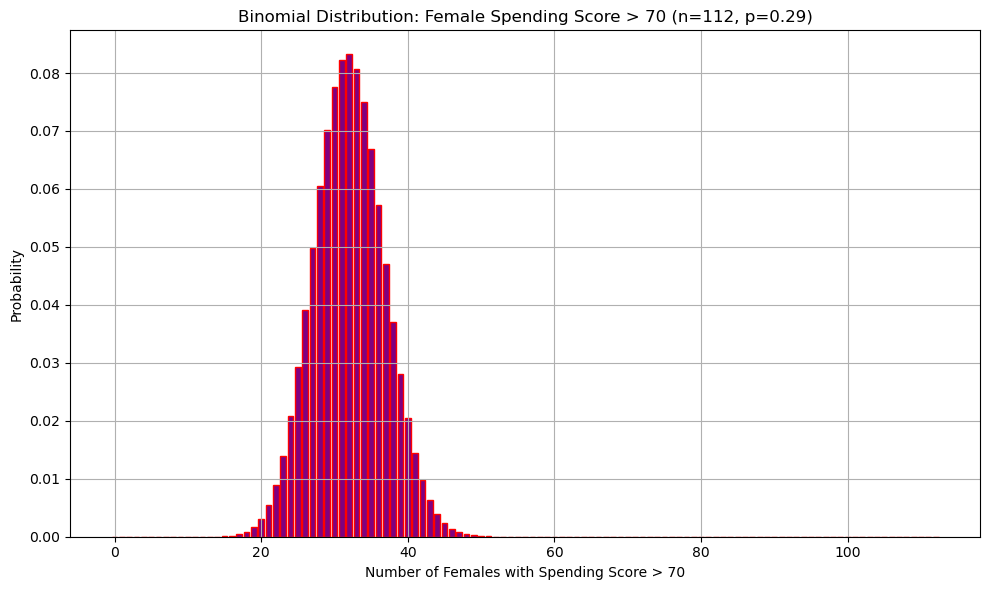

Number of male customers: 88
Number with spending score > 70: 22
Probability (P): 0.25


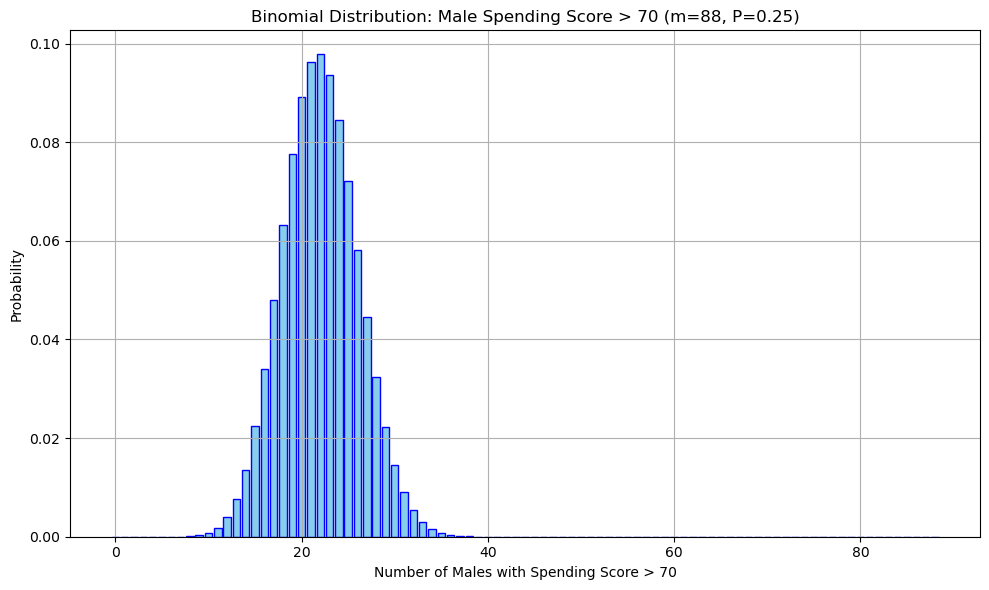

In [15]:
female_customers = dataset[dataset['Genre'] == 'Female']
# Calculate the number of female customers
n = len(female_customers)

# Calculate the number of females with spending score > 70
successes = len(female_customers[female_customers['Spending Score (1-100)'] > 70])

# Calculate the probability
p = successes / n

print(f"Number of female customers: {n}")
print(f"Number with spending score > 70: {successes}")
print(f"Probability (p): {p:.2f}")
from scipy.stats import binom

# Define the range of possible successes
x = range(n + 1)

# Calculate the binomial probability mass function (PMF)
pmf = binom.pmf(x, n, p)
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='purple', edgecolor='red')
plt.title(f'Binomial Distribution: Female Spending Score > 70 (n={n}, p={p:.2f})')
plt.xlabel('Number of Females with Spending Score > 70')
plt.ylabel('Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

male_customers = dataset[dataset['Genre'] == 'Male']
# Calculate the number of female customers
m = len(male_customers)

# Calculate the number of females with spending score > 70
Successes = len(male_customers[male_customers['Spending Score (1-100)'] > 70])

# Calculate the probability
P = Successes / m

print(f"Number of male customers: {m}")
print(f"Number with spending score > 70: {Successes}")
print(f"Probability (P): {P:.2f}")

# Define the range of possible successes
X = range(m + 1)

# Calculate the binomial probability mass function (PMF)
pmf = binom.pmf(X, m, P)
plt.figure(figsize=(10, 6))
#plt.bar(x, pmf, color='purple', edgecolor='red')
plt.bar(X, pmf, color='skyblue', edgecolor='blue')
plt.title(f'Binomial Distribution: Male Spending Score > 70 (m={m}, P={P:.2f})')
plt.xlabel('Number of Males with Spending Score > 70')
plt.ylabel('Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

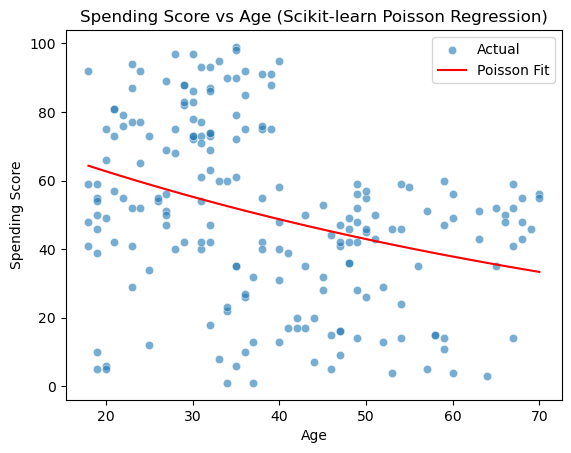

If younger people tend to have higher spending scores (common in retail), the red line will go down as age increases 


In [16]:
from sklearn.linear_model import PoissonRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# Rename column if needed
dataset.rename(columns={'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# Define X (age) and y (spending score)
X = dataset[['Age']]  # 2D input for sklearn
y = dataset['Spending_Score']

# Fit Poisson regression using sklearn
model = PoissonRegressor()
model.fit(X, y)

# Predict
dataset['Predicted_Score'] = model.predict(X)

# Plot
sns.scatterplot(x='Age', y='Spending_Score', data=dataset, label='Actual', alpha=0.6)
sns.lineplot(x='Age', y='Predicted_Score', data=dataset, color='red', label='Poisson Fit')
plt.title("Spending Score vs Age (Scikit-learn Poisson Regression)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.show()
print(f"\033[1mIf younger people tend to have higher spending scores (common in retail), the red line will go down as age increases \033[0m")